<h1 align="center">Exploratory Data Analysis</h1>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['font.size'] = 10
# set font of xstics and ystics
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# 1. Trực quan hóa dữ liệu sau khi cào và làm sạch

In [2]:
data = pd.read_csv('clean_data_1k.csv')
data.head()

,price,brand,ram,ram_type,display_size,display_type,resolution,screen_rate,screen_panel,length,width,height,cpu_brand,gpu_brand,ssd,os,weight,cpu_point,gpu_point,features
0,1559.00,ASUS,24.0,DDR4,14.0,WQHD,2560 x 1440,120.0,IPS,324.0,222.0,17.90,AMD,NVIDIA,1000.0,WINDOWS,1.60,13179.0,5970.0,FINGERPRINT READER
1,1169.95,LENOVO,16.0,DDR4,16.0,WUXGA,1920 x 1200,NaN,IPS,361.9,255.5,20.50,INTEL,INTEL,512.0,WINDOWS,1.65,9933.0,1435.0,FINGERPRINT READER
2,1149.00,HP,32.0,DDR4,15.6,FHD,1920 x 1080,NaN,IPS,358.0,242.0,17.90,INTEL,INTEL,1000.0,WINDOWS,1.70,5125.0,1435.0,FINGERPRINT READER
3,419.00,LENOVO,8.0,DDR4,13.3,FHD,1920 x 1080,NaN,IPS,310.0,214.0,16.95,INTEL,INTEL,128.0,CHROME OS,1.35,3056.0,NaN,WEB CAMERA
4,1979.99,MSI,16.0,DDR4,15.6,FHD,1920 x 1080,144.0,IPS,359.0,259.0,24.90,INTEL,NVIDIA,4000.0,WINDOWS,2.25,15486.0,8290.0,FINGERPRINT READER


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         947 non-null    float64
 1   brand         947 non-null    object 
 2   ram           947 non-null    float64
 3   ram_type      947 non-null    object 
 4   display_size  946 non-null    float64
 5   display_type  946 non-null    object 
 6   resolution    946 non-null    object 
 7   screen_rate   321 non-null    float64
 8   screen_panel  946 non-null    object 
 9   length        943 non-null    float64
 10  width         943 non-null    float64
 11  height        943 non-null    float64
 12  cpu_brand     947 non-null    object 
 13  gpu_brand     947 non-null    object 
 14  ssd           944 non-null    float64
 15  os            944 non-null    object 
 16  weight        947 non-null    float64
 17  cpu_point     869 non-null    float64
 18  gpu_point     807 non-null    

Thông tin về các cột trong bộ dữ liệu:
- Tổng số dòng: 8636
- Tổng số cột: 20 (11 cột số và 9 cột category)

| STT | Tên cột | Ý nghĩa |
| --- | --- | --- |
| 1 | price | Giá bán của laptop (USD) |
| 2 | brand | Nhà sản xuất |
| 3 | ram | Dung lượng RAM (GB) |
| 4 | ram_type | Loại RAM |
| 5 | display_size | Kích thước màn hình (inch) |
| 6 | display_type | Loại màn hình (HD/FHD,...) |
| 7 | resolution | Độ phân giải |
| 8 | screen_rate | Tần số quét (Hz) |
| 9 | screen_panel | Tấm nền màn hình (IPS/TN/VA,...) |
| 10 | length | Chiều dài (mm) |
| 11 | width | Chiều rộng (mm) |
| 12 | height | Chiều cao (mm) |
| 13 | cpu_brand | Nhà sản xuất CPU |
| 14 | gpu_brand | Nhà sản xuất GPU |
| 15 | ssd | Dung lượng SSD (GB) |
| 16 | os | Hệ điều hành |
| 17 | weight | Trọng lượng (kg) |
| 18 | cpu_point | Điểm CPU |
| 19 | gpu_point | Điểm GPU |
| 20 | features | Tính năng |

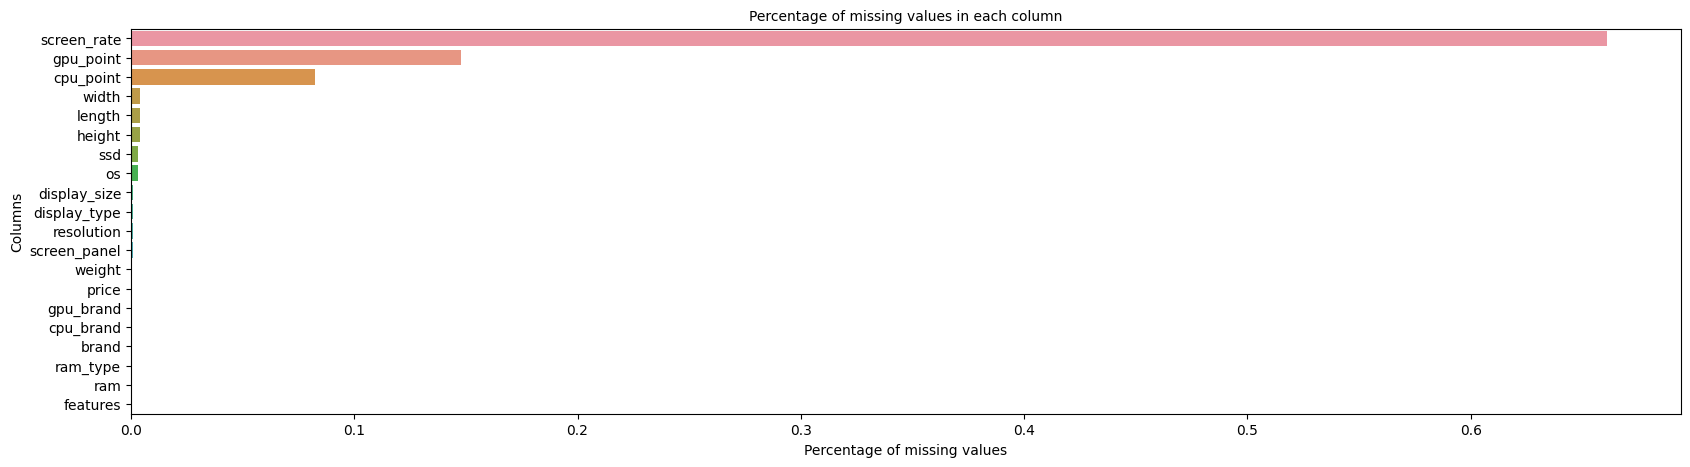

In [4]:
# plot percentage of missing values in each column using barplot sort by percentage of missing values

plt.figure(figsize=(20, 5))
sns.barplot(x=data.isnull().sum().sort_values(ascending=False)/len(data), y=data.isnull().sum().sort_values(ascending=False).index)
plt.title('Percentage of missing values in each column')
plt.xlabel('Percentage of missing values')
plt.ylabel('Columns')
# plt.xticks(rotation=90)
plt.show()

## 2. Trực quan dữ liệu dạng category

In [5]:
# get categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(col)

brand
ram_type
display_type
resolution
screen_panel
cpu_brand
gpu_brand
os
features


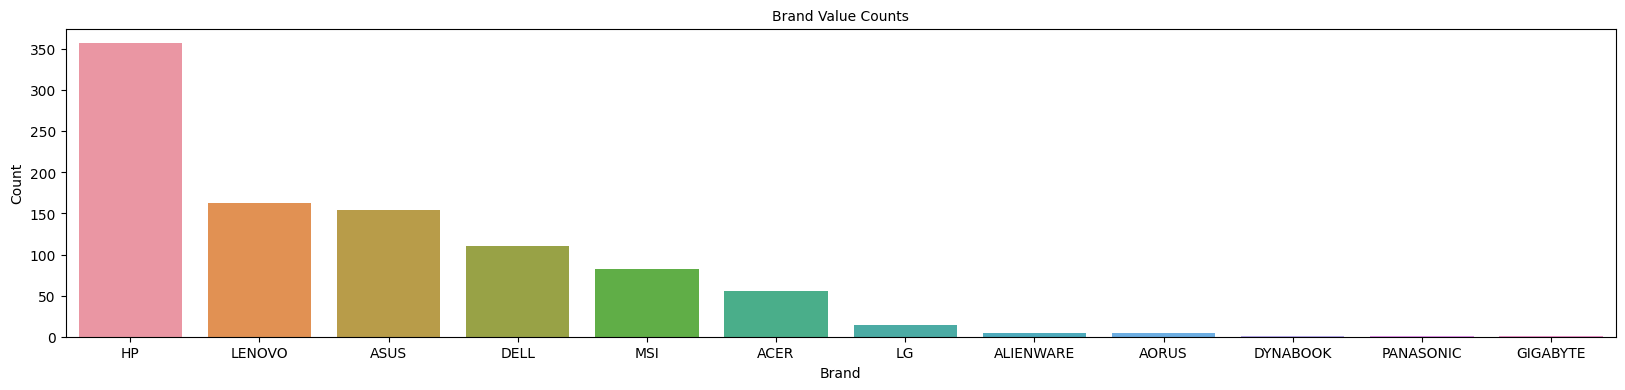

In [6]:
# plot brand value counts sorted
plt.figure(figsize=(20, 4))
sns.countplot(x = data['brand'], data = data, order = data['brand'].value_counts().index)
plt.title('Brand Value Counts')
plt.xlabel('Brand')
plt.ylabel('Count')
# set font of value counts
plt.show()

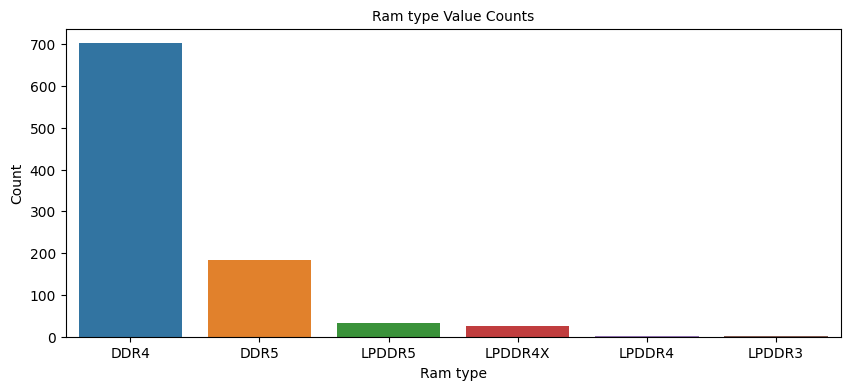

In [7]:
# plot brand value counts sorted
plt.figure(figsize=(10, 4))
sns.countplot(x=data['ram_type'], data=data,
              order=data['ram_type'].value_counts().index)
plt.title('Ram type Value Counts')
plt.xlabel('Ram type')
plt.ylabel('Count')
plt.show()

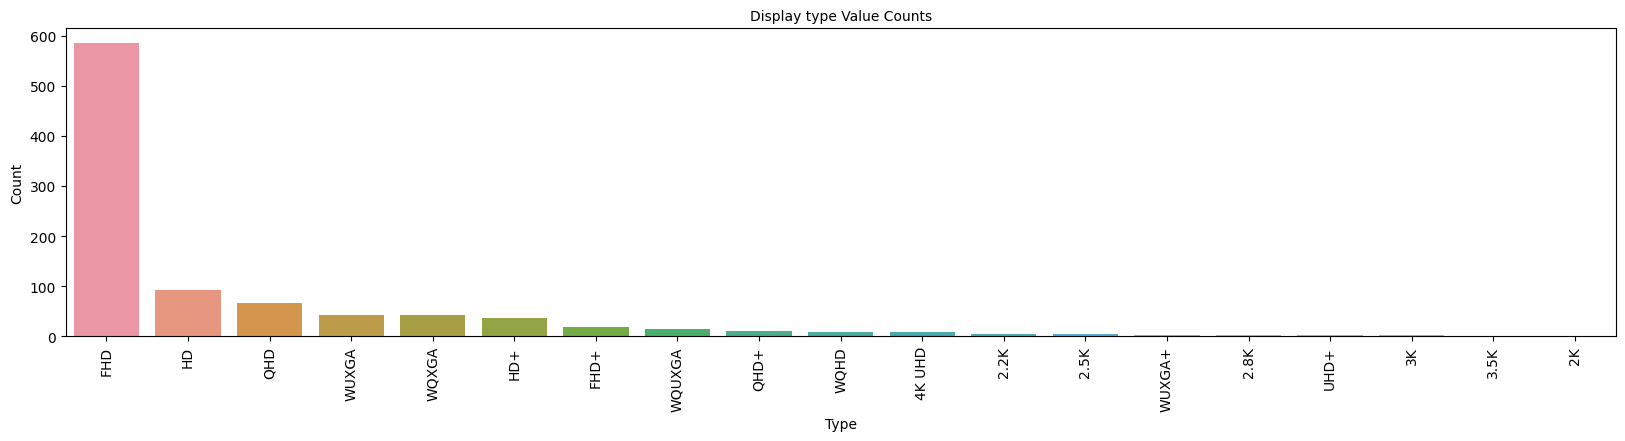

In [8]:
# plot brand value counts sorted
plt.figure(figsize=(20, 4))
sns.countplot(x=data['display_type'], data=data,
              order=data['display_type'].value_counts().index)
plt.title('Display type Value Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


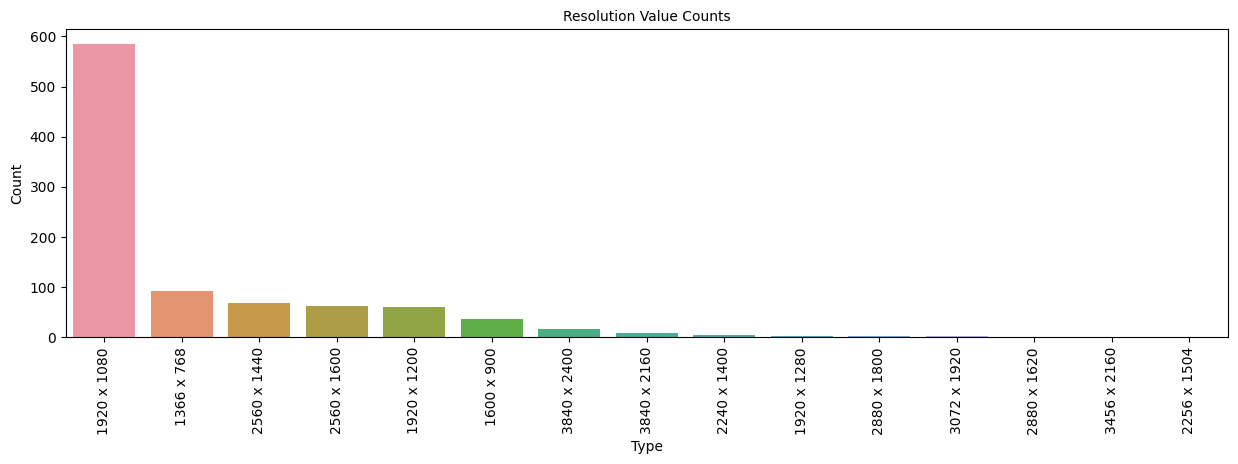

In [9]:
# plot brand value counts sorted
plt.figure(figsize=(15, 4))
sns.countplot(x=data['resolution'], data=data, order=data['resolution'].value_counts().index)
plt.title('Resolution Value Counts')
plt.xlabel('Type')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()


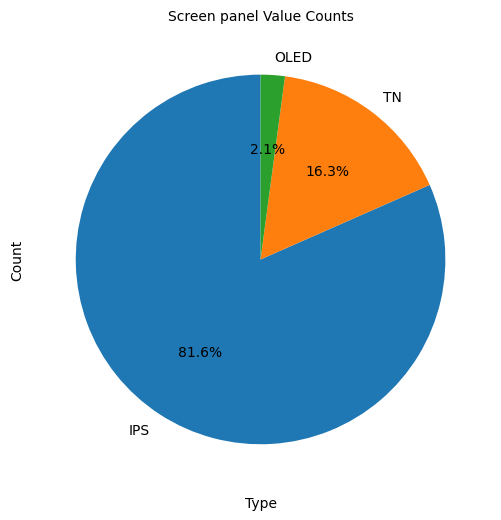

In [10]:
# plot brand value counts sorted
plt.figure(figsize=(15, 6))

plt.pie(data['screen_panel'].value_counts(), labels=data['screen_panel'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Screen panel Value Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


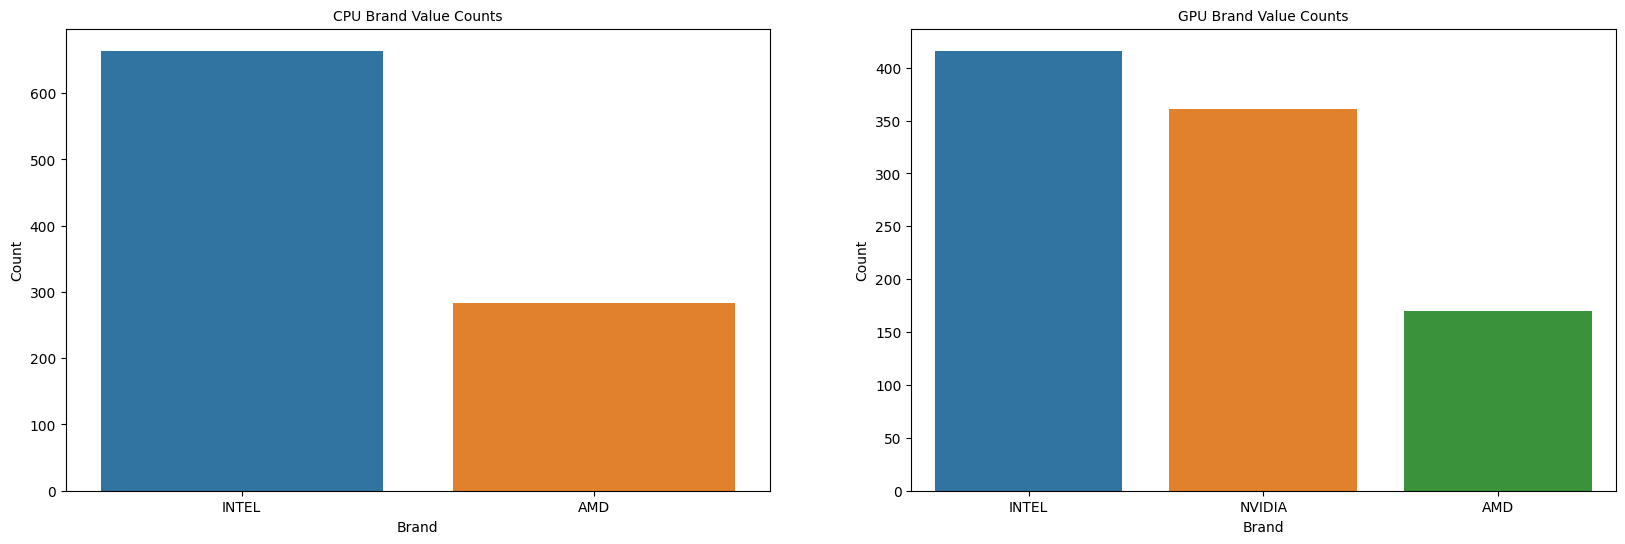

In [11]:
# create subplot of 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
# plot bar chart of CPU brand value counts using seaborn
sns.countplot(x=data['cpu_brand'], data=data, order=data['cpu_brand'].value_counts().index, ax=ax[0])
ax[0].set_title('CPU Brand Value Counts')
ax[0].set_xlabel('Brand')
ax[0].set_ylabel('Count')
# plot bar chart of GPU brand value counts
sns.countplot(x=data['gpu_brand'], data=data, order=data['gpu_brand'].value_counts().index, ax=ax[1])
ax[1].set_title('GPU Brand Value Counts')
ax[1].set_xlabel('Brand')
ax[1].set_ylabel('Count')
plt.show()


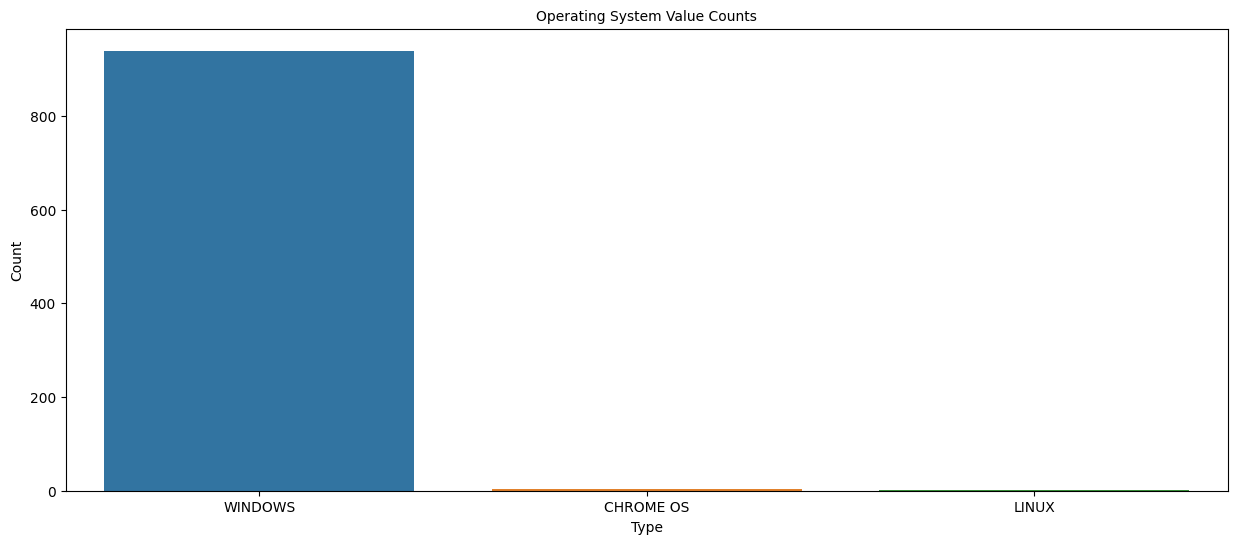

In [12]:
# plot brand value counts sorted
plt.figure(figsize=(15, 6))
sns.countplot(x=data['os'], data=data, order=data['os'].value_counts().index)
plt.title('Operating System Value Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


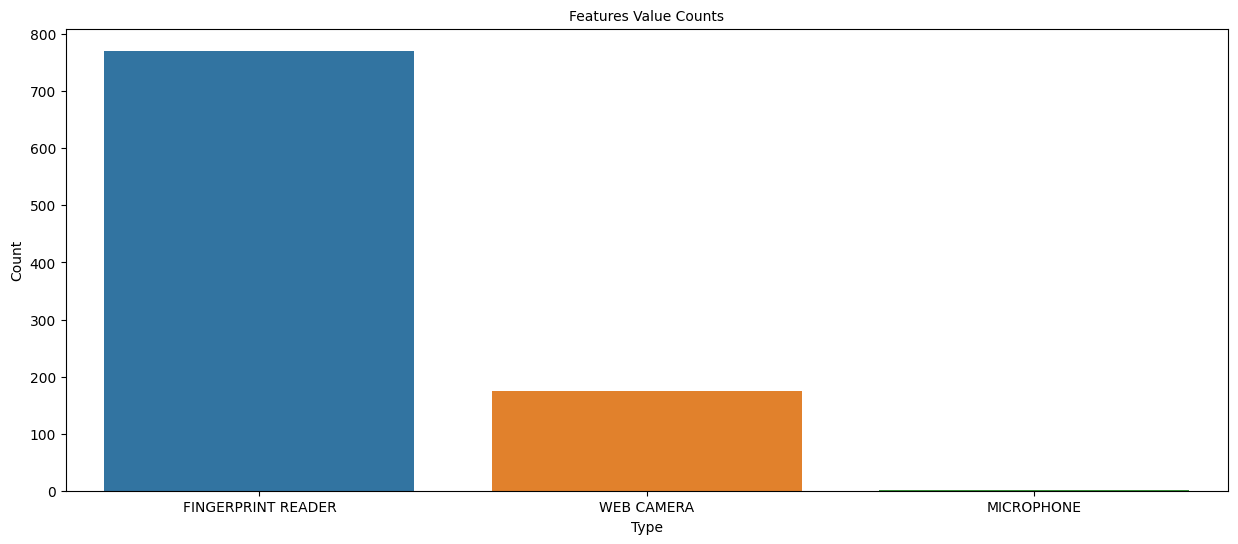

In [13]:
# plot brand value counts sorted
plt.figure(figsize=(15, 6))
sns.countplot(x=data['features'], data=data,
              order=data['features'].value_counts().index)
plt.title('Features Value Counts')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


## 3. Trực quan dữ liệu dạng numeric

In [14]:
num_data = data.drop(cat_cols, axis=1)
for col in num_data.columns:
    print(col)

price
ram
display_size
screen_rate
length
width
height
ssd
weight
cpu_point
gpu_point


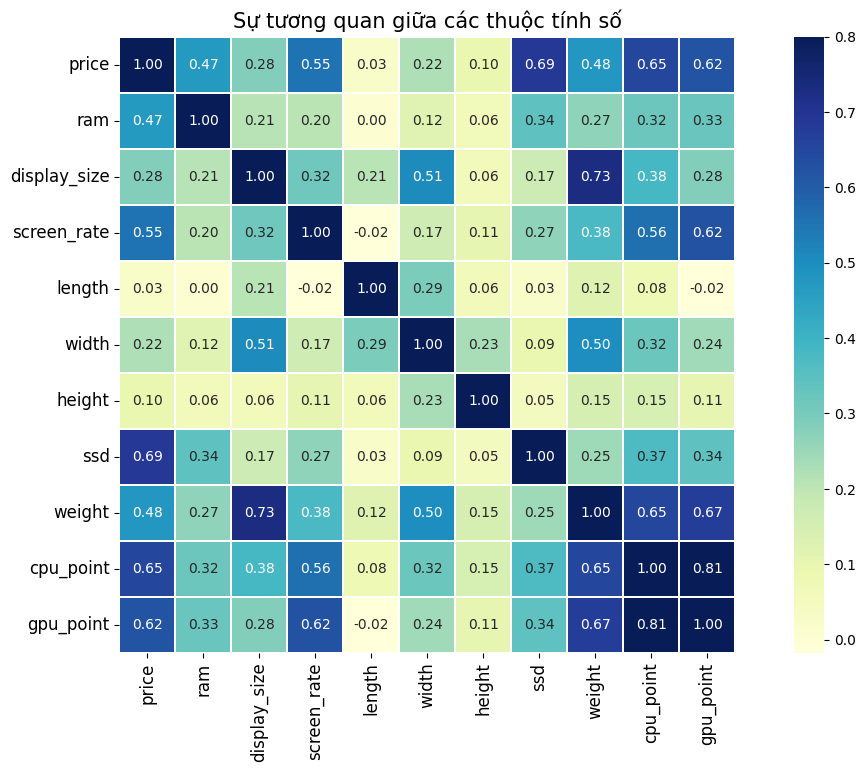

In [15]:
# plot heatmap for numerical columns
plt.figure(figsize=(15,8))
sns.heatmap(num_data.corr(), vmax=.8, linewidths=0.01, cbar=True, cmap='YlGnBu', linecolor="white", annot=True, square=True,
            fmt='.2f', annot_kws={'size': 10})
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Sự tương quan giữa các thuộc tính số', fontsize=15)
plt.show()


In [16]:
print("Top correlated features with price")
num_data.corr()['price'].sort_values(ascending=False).head(4)

Top correlated features with price


price        1.000000
ssd          0.685246
cpu_point    0.652956
gpu_point    0.618141
Name: price, dtype: float64

Text(0.5, 1.0, 'Sự tương quan giữa giá và dung lượng SSD')

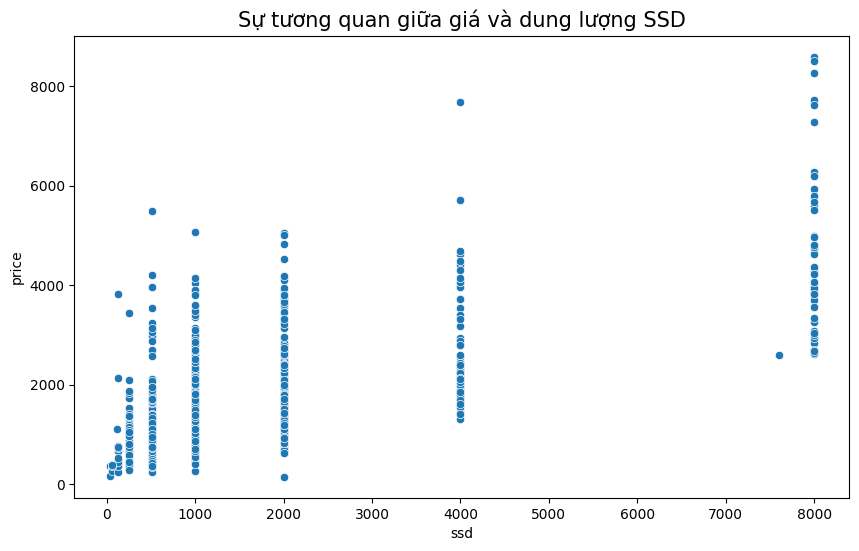

In [17]:
# plot scatter plot for price and ssd column
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['ssd'], y=data['price'], data=data['price'])
plt.title('Sự tương quan giữa giá và dung lượng SSD', fontsize=15)

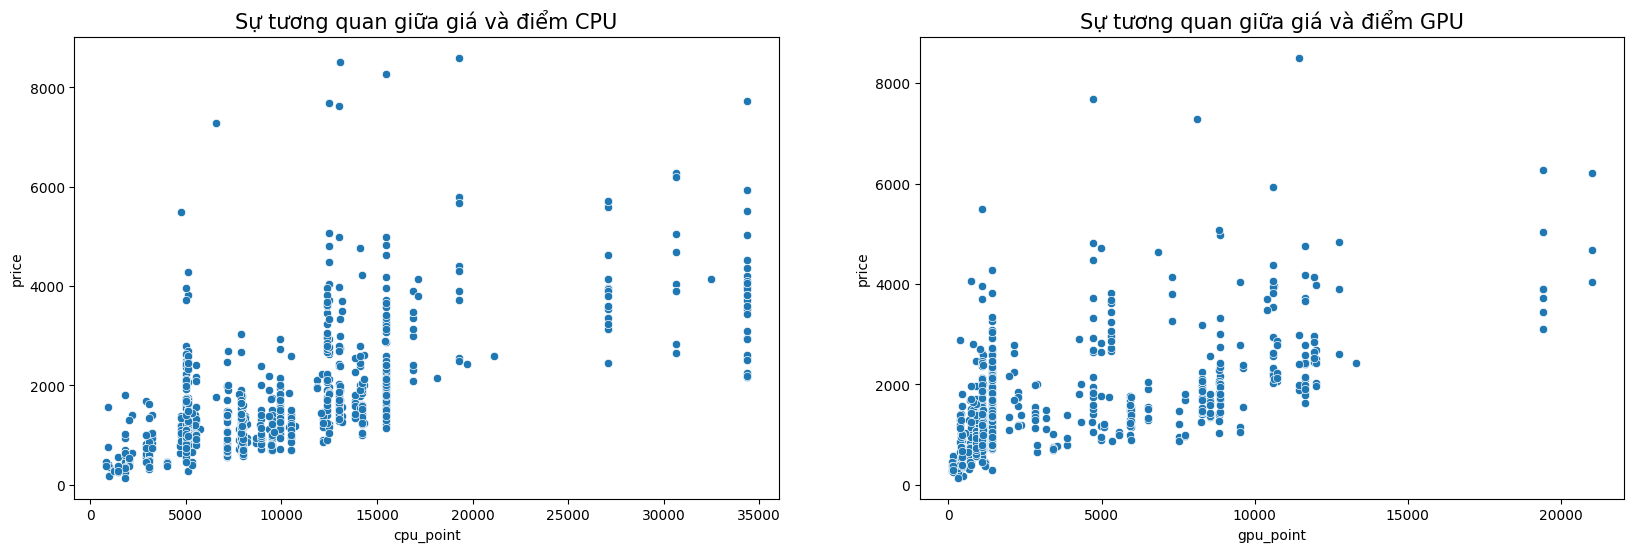

In [18]:
# create subplot of 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
# plot scatter plot for price and cpu_point column
sns.scatterplot(x=data['cpu_point'], y=data['price'], data=data['price'], ax=ax[0])
ax[0].set_title('Sự tương quan giữa giá và điểm CPU', fontsize=15)
# plot scatter plot for price and gpu_point column
sns.scatterplot(x=data['gpu_point'], y=data['price'], data=data['price'], ax=ax[1])
ax[1].set_title('Sự tương quan giữa giá và điểm GPU', fontsize=15)
plt.show()

In [19]:
def plot_num_data(df, col):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    sns.histplot(df[col], bins=50, ax=axes[0])
    # plot kde line
    sns.kdeplot(df[col], ax=axes[1])
    sns.boxplot(data=df, x=col, ax=axes[2])
    # plot mean line
    mean = df[col].mean()
    axes[0].axvline(mean, color='r', linestyle='--')
    axes[1].axvline(mean, color='r', linestyle='--')
    # set text size for axes
    for ax in axes:
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        # set labels size
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
    plt.tight_layout()



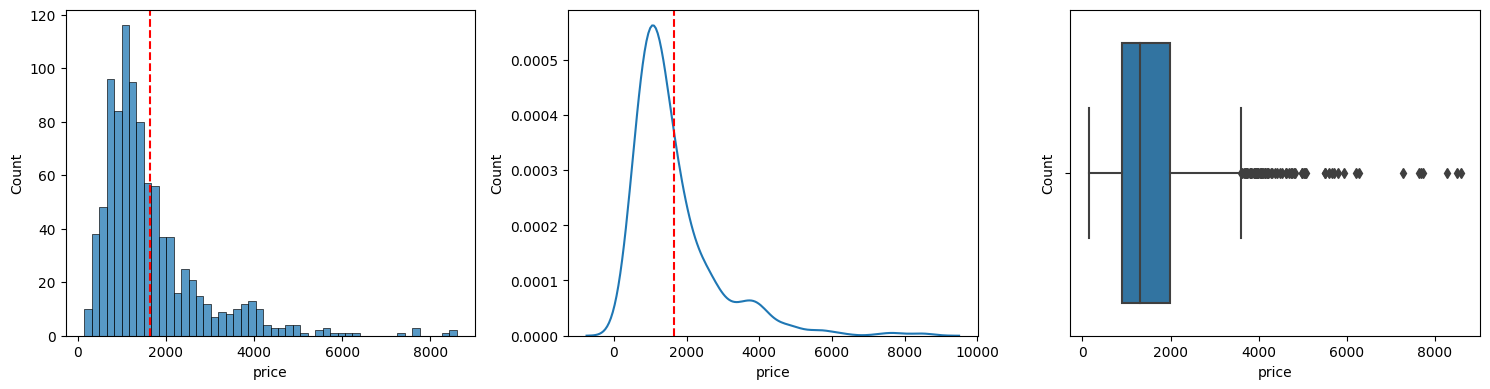

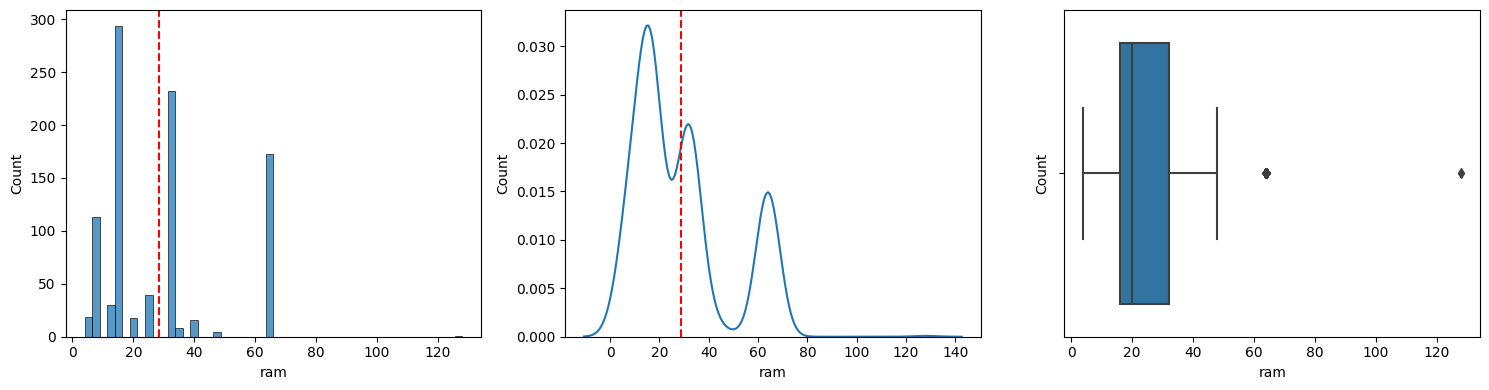

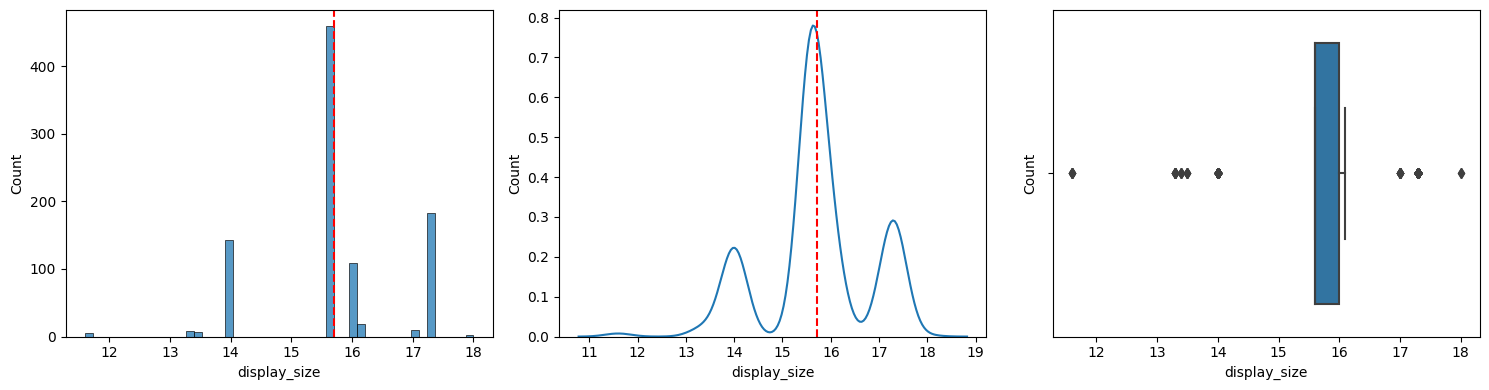

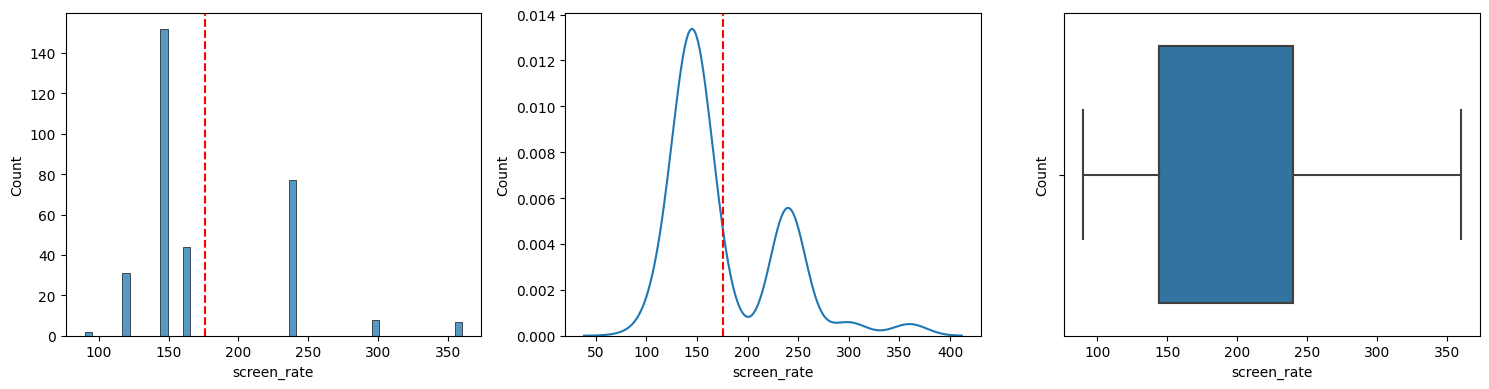

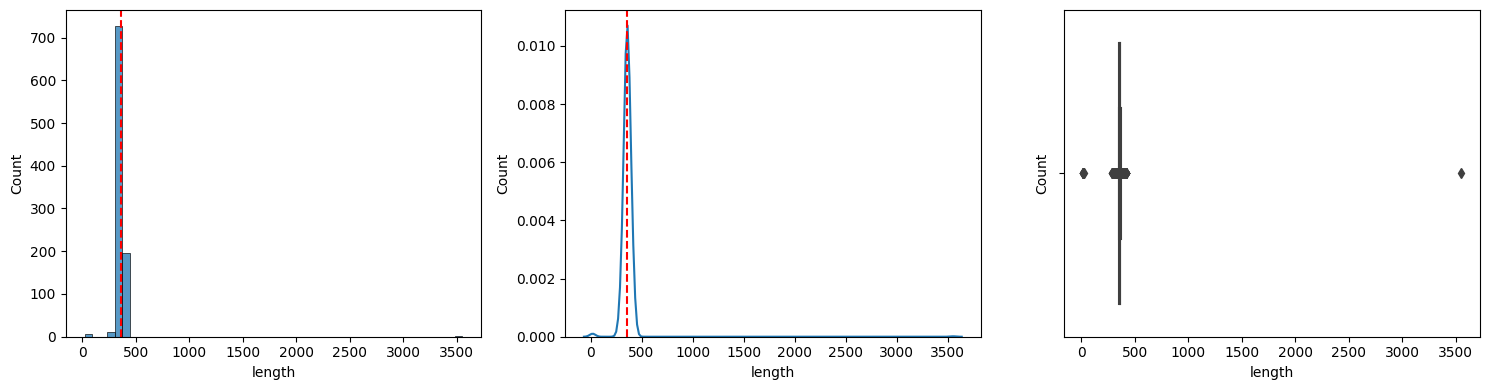

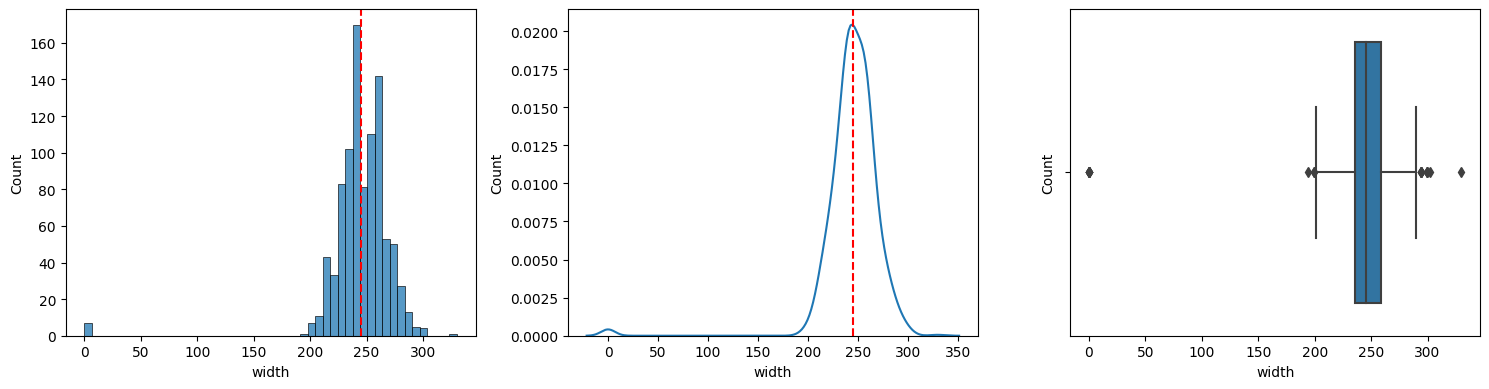

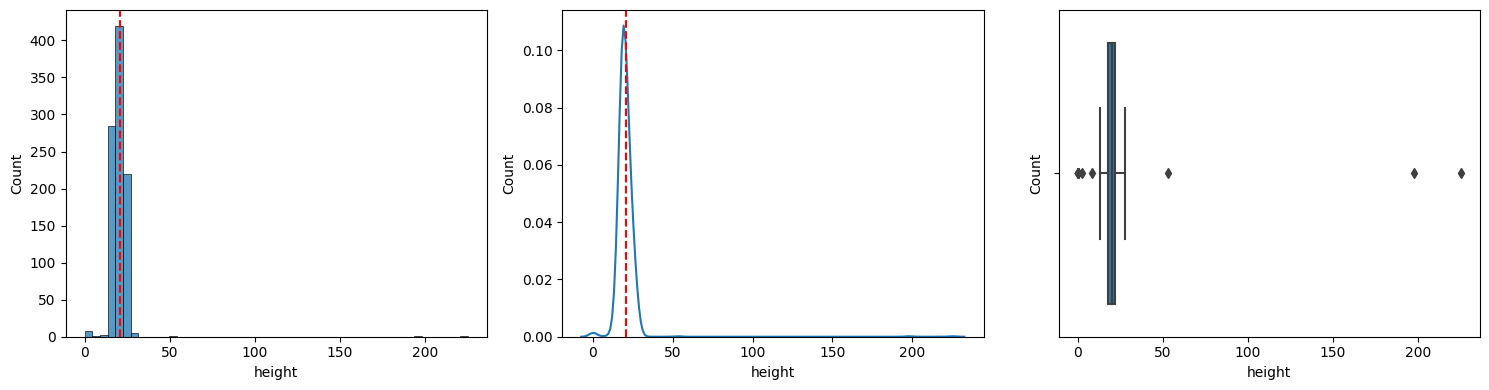

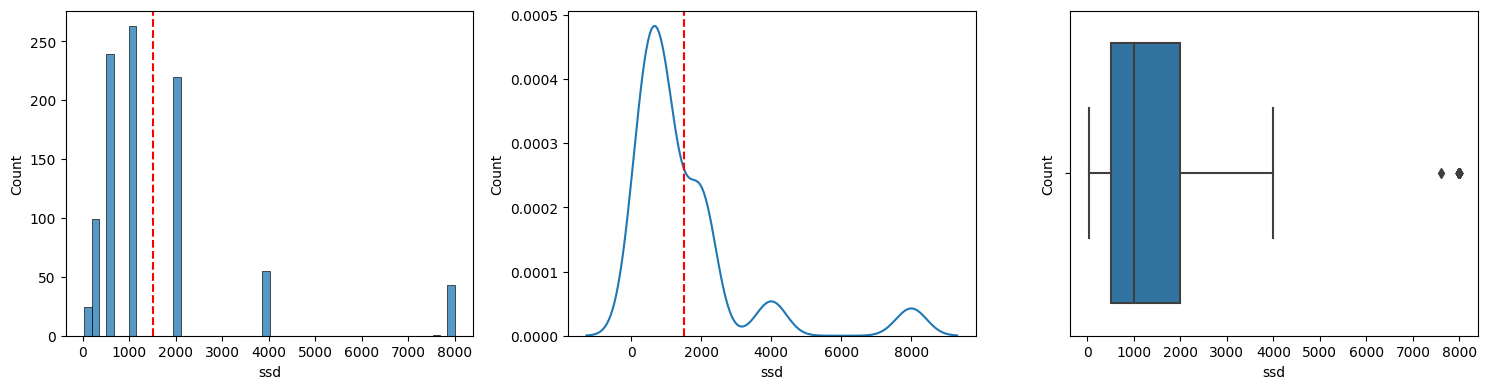

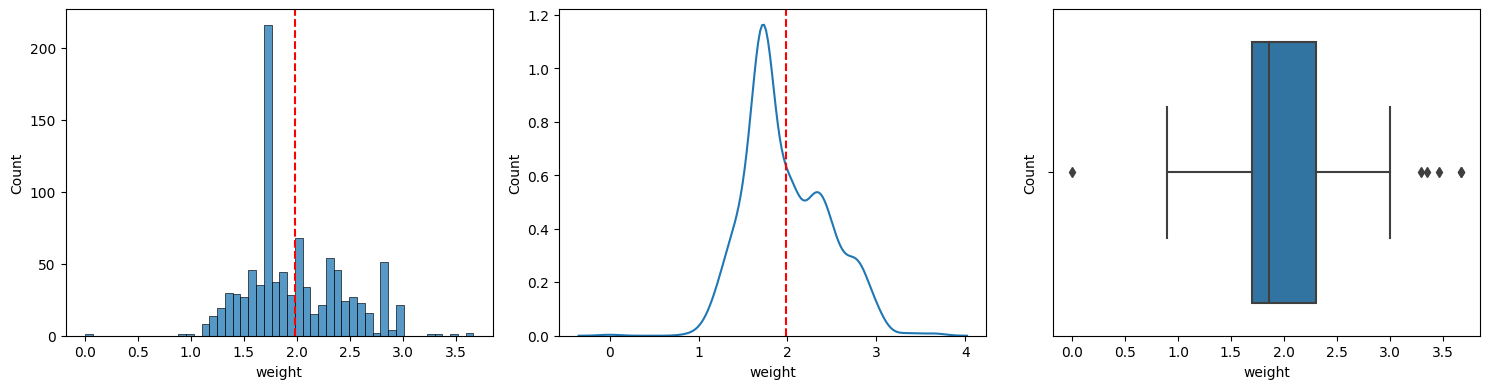

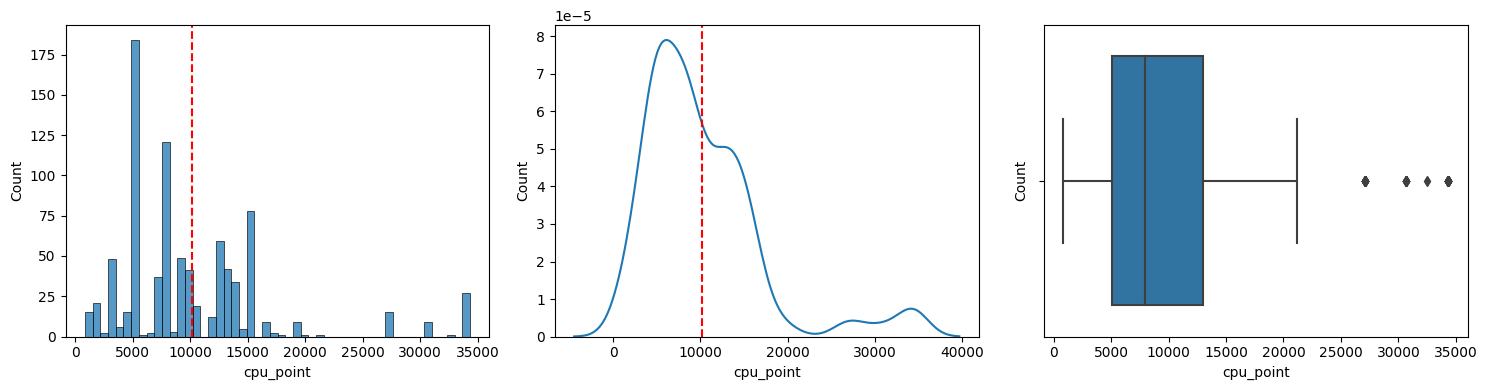

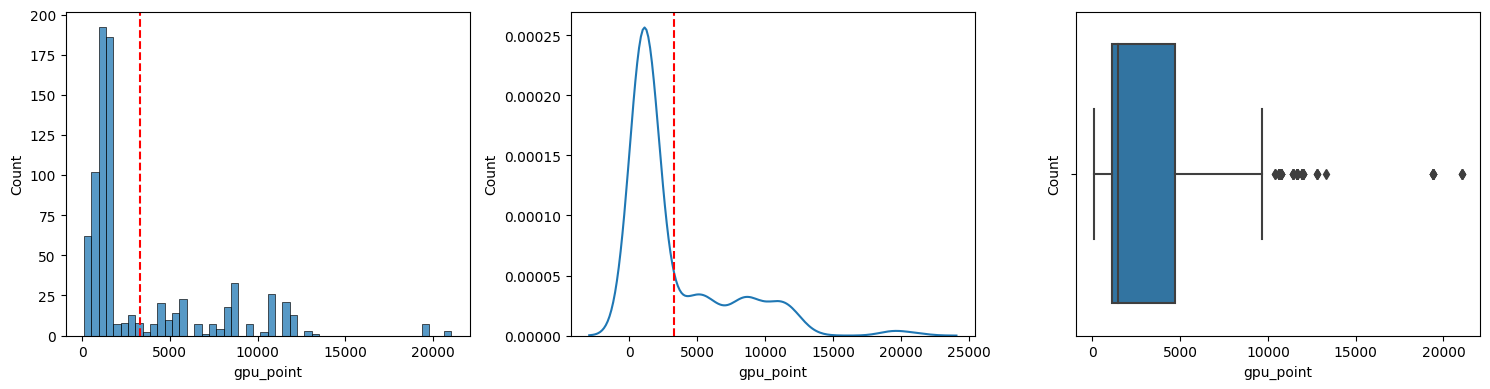

In [20]:
# important_col = num_data.corr()['price'].sort_values(ascending=False).head(6).index
# for col in important_col:
#     plot_num_data(data, col)

for col in num_data.columns:
    plot_num_data(data, col)
